## HW related

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Q2

In [11]:
## sample points from the required distribution
n = 1000
mu = 0
sample = np.random.uniform(size = n)
sample[sample>0.5] = 1
sample[sample<=0.5] = -1
np.mean(sample)-mu

-0.024

(array([512.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 488.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

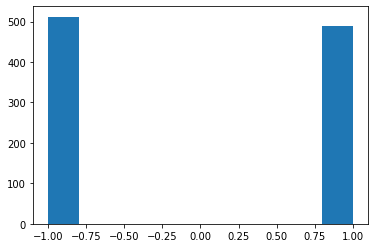

In [12]:
plt.hist(sample)

In [13]:
N = 10000
## repeat above procedure to get N means and complete the questions

Q3

In [15]:
# if you haven't install pyreadr
#!pip install pyreadr

     |████████████████████████████████| 182 kB 1.3 MB/s eta 0:00:01


In [23]:
import pyreadr
result = pyreadr.read_r('hw1/Amazon.Rdata')
# check the objects we get
print(result.keys())


odict_keys(['dat'])


In [33]:
df = result["dat"]
##checking the keys within df
print(df.keys())
text = df.loc[:, "review"]
text

Index(['name', 'review', 'rating'], dtype='object')


0       My husband and I selected the Diaper "Champ" m...
1       I have had a diaper genie for almost 4 years s...
2       We loved this pail at first. The mechanism see...
3       Bad construction is my main issue. My husband ...
4       Diaper catches and jams in the well and that i...
                              ...                        
1307    Got this for a gift, not too expensive and the...
1308    Our previous Sony monitor\'s speaker unit was ...
1309    Don\'t waste your money on cheaper models. The...
1310    I bought this monitor for my third child.  I h...
1311    I went ahead and purchased the Sony Baby Call ...
Name: review, Length: 1312, dtype: category
Categories (1307, object): [, "Sophie the Giraffe" has tested positive for p..., "This gate expands from 29 to 52".  This is to..., (This is a long review, but if you read the wh..., ..., we are constantly having troubles with getting..., we bought it from amazon and had used it for o..., we bought this swing thinkin

In [29]:
## set up
import pandas as pd
from nltk.stem.snowball import FrenchStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
stemmer = FrenchStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc): return (stemmer.stem(w) for w in analyzer(doc))

In [30]:
## Document Term Matrix generation
vec = CountVectorizer(analyzer=stemmed_words) # remove numbers
X = vec.fit_transform(text)
dtm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(dtm.shape)


(1312, 5186)


In [31]:
## Tf-idf matrix generation
vectorizer = TfidfVectorizer(token_pattern='[a-z]{3,15}') # remove numbers
Tfidf = vectorizer.fit_transform(text)
Tfidf = pd.DataFrame(Tfidf.toarray(), columns=vectorizer.get_feature_names())
print(Tfidf.shape)

(1312, 5806)


In [36]:
Tfidf.iloc[1,0:100]

ability       0.000000
able          0.075259
about         0.000000
above         0.000000
absolute      0.000000
                ...   
aftermath     0.000000
afterwards    0.000000
again         0.000000
against       0.000000
age           0.000000
Name: 1, Length: 100, dtype: float64

In [37]:
dtm.iloc[1,0:100]

00                  0
000                 0
08                  0
09                  0
10                  0
                   ..
4oz                 0
4surpluscitystor    0
4th                 0
50                  0
52                  0
Name: 1, Length: 100, dtype: int64

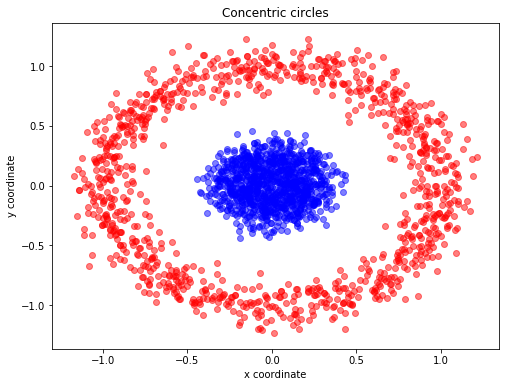

In [38]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
X, y = make_circles(n_samples=2000, random_state=123, noise=0.1, factor=0.2) ## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)


Text(0.5, 1.0, 'TSNE')

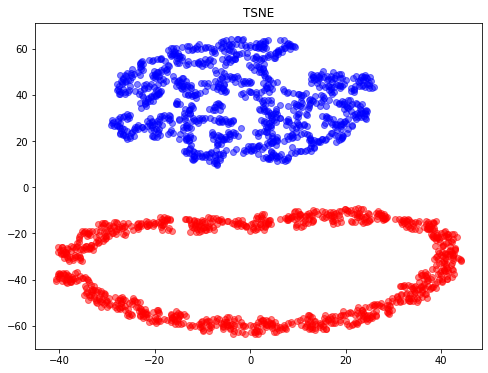

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[y==0, 0], X_tsne[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_tsne[y==1, 0], X_tsne[y==1, 1], color='blue', alpha=0.5)

plt.title("TSNE")


In [44]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
X_MDS = model.fit_transform(pairwise_distances(X))

Text(0.5, 1.0, 'MDS')

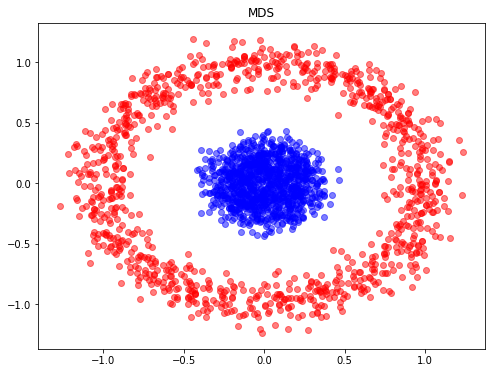

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(X_MDS[y==0, 0], X_MDS[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_MDS[y==1, 0], X_MDS[y==1, 1], color='blue', alpha=0.5)

plt.title("MDS")


In [50]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='standard',
                               eigen_solver='dense')
X_LLE = model.fit_transform(X)

Text(0.5, 1.0, 'LLE')

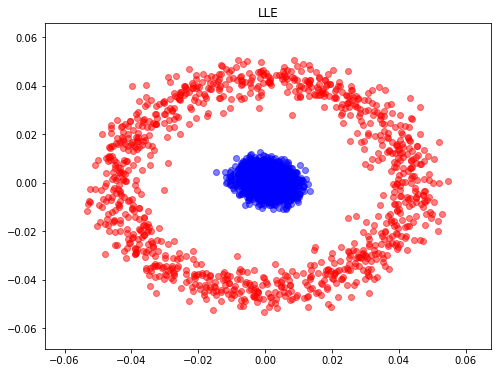

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(X_LLE[y==0, 0], X_LLE[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_LLE[y==1, 0], X_LLE[y==1, 1], color='blue', alpha=0.5)

plt.title("LLE")


LLE: 0.17 sec
LTSA: 0.26 sec
Hessian LLE: 0.36 sec
Modified LLE: 0.26 sec
Isomap: 0.44 sec
MDS: 2.5 sec
SE: 0.08 sec
t-SNE: 5.9 sec


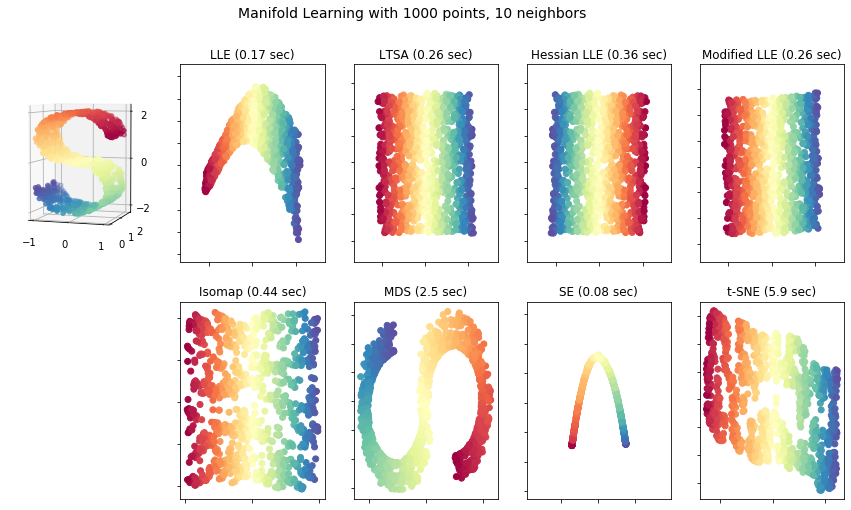

In [54]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

In [53]:
X

array([[ 0.44399868,  1.18576054, -0.10397256],
       [ 0.89724097,  0.02012739, -1.44154121],
       [ 0.8240493 ,  0.95165239, -0.43348191],
       ...,
       [-0.8362143 ,  0.96021561, -1.54840282],
       [-0.55148773,  1.28772807,  1.834183  ],
       [ 0.99513117,  1.00354626, -1.09855936]])